In [12]:
import pandas as pd

gpt_3point5 = pd.read_csv('/content/results3.5-1.csv')
gpt_4 = pd.read_csv('/content/results4.csv')
gpt_4o = pd.read_csv('/content/results4o.csv')

display(gpt_3point5)
display(gpt_4)
display(gpt_4o)

,id,Model,percent,AI Response
0,1.0,GPT-3.5,0,73
1,2.0,GPT-3.5,0,77
2,3.0,GPT-3.5,0,85
3,4.0,GPT-3.5,0,87
4,5.0,GPT-3.5,0,85
...,...,...,...,...
496,497.0,GPT-4,0,73
497,498.0,GPT-4,0,73
498,499.0,GPT-4,0,77
499,500.0,GPT-4,0,77


,id,Model,percent,AI Response
0,1,GPT-3.5,0,95
1,2,GPT-3.5,0,95
2,3,GPT-3.5,0,95
3,4,GPT-3.5,0,50
4,5,GPT-3.5,0,95
...,...,...,...,...
496,497,GPT-4,0,95
497,498,GPT-4,0,85
498,499,GPT-4,0,95
499,500,GPT-4,0,95


,id,Model,percent,AI Response
0,1.0,GPT-3.5,0,100
1,2.0,GPT-3.5,0,90
2,3.0,GPT-3.5,0,90
3,4.0,GPT-3.5,0,100
4,5.0,GPT-3.5,0,90
...,...,...,...,...
496,497.0,GPT-4,0,90
497,498.0,GPT-4,0,100
498,499.0,GPT-4,0,100
499,500.0,GPT-4,0,90


In [13]:
# display(gpt_3point5)
# display(gpt_4)
# display(gpt_4o)

# test_df = df
# test_df = test_df[['생성 Text', 'model']]
gpt_3point5['label'] = gpt_3point5['Model'].apply(lambda x: 1 if 'gpt' in str(x).lower() else 0)
gpt_4['label'] = gpt_4['Model'].apply(lambda x: 1 if 'gpt' in str(x).lower() else 0)
gpt_4o['label'] = gpt_4o['Model'].apply(lambda x: 1 if 'gpt' in str(x).lower() else 0)

gpt_3point5['AI_Response_fixed'] = gpt_4o['AI Response'].apply(lambda x: x/100)
gpt_4['AI_Response_fixed'] = gpt_4['AI Response'].apply(lambda x: x/100)
gpt_4o['AI_Response_fixed'] = gpt_4o['AI Response'].apply(lambda x: x/100)

display(gpt_3point5.head())
display(gpt_4.head())
display(gpt_4o.head())

,id,Model,percent,AI Response,label,AI_Response_fixed
0,1.0,GPT-3.5,0,73,1,1.0
1,2.0,GPT-3.5,0,77,1,0.9
2,3.0,GPT-3.5,0,85,1,0.9
3,4.0,GPT-3.5,0,87,1,1.0
4,5.0,GPT-3.5,0,85,1,0.9


,id,Model,percent,AI Response,label,AI_Response_fixed
0,1,GPT-3.5,0,95,1,0.95
1,2,GPT-3.5,0,95,1,0.95
2,3,GPT-3.5,0,95,1,0.95
3,4,GPT-3.5,0,50,1,0.50
4,5,GPT-3.5,0,95,1,0.95


,id,Model,percent,AI Response,label,AI_Response_fixed
0,1.0,GPT-3.5,0,100,1,1.0
1,2.0,GPT-3.5,0,90,1,0.9
2,3.0,GPT-3.5,0,90,1,0.9
3,4.0,GPT-3.5,0,100,1,1.0
4,5.0,GPT-3.5,0,90,1,0.9


In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_roc_auc(title, test_df):
  # 실제 라벨
  y_true = test_df['label'].values

  # ROC 곡선 그리기
  fpr, tpr, thresholds = roc_curve(y_true, test_df['AI Response'])
  roc_auc = auc(fpr, tpr)

  # ROC 곡선 시각화
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")

  # ROC-AUC 면적 출력
  print("ROC-AUC 면적:", roc_auc)

  plt.show()

ROC-AUC 면적: 0.5265396825396825


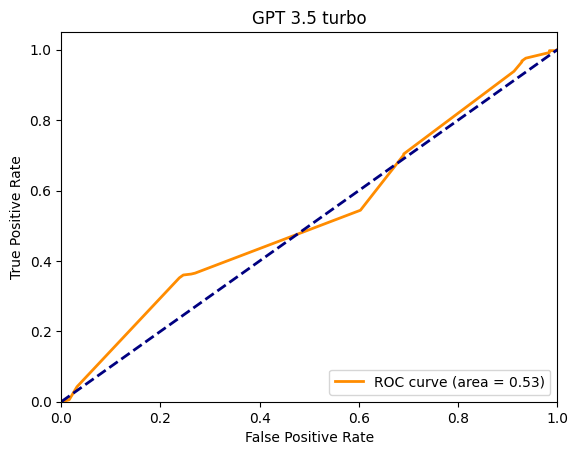

ROC-AUC 면적: 0.5831216931216932


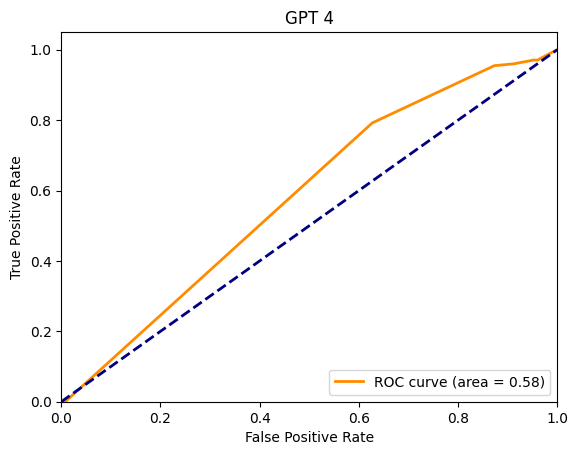

ROC-AUC 면적: 0.44680423280423287


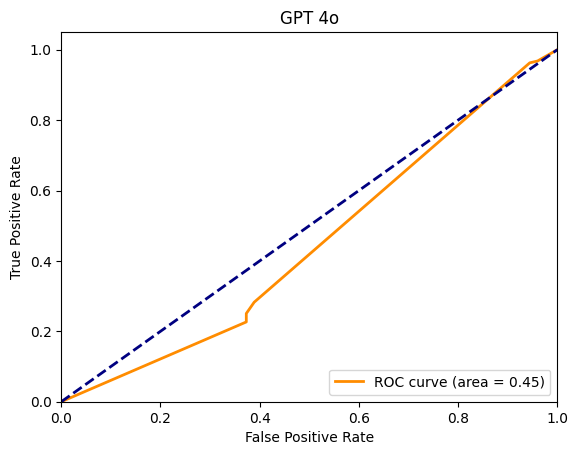

In [19]:
get_roc_auc("GPT 3.5 turbo",gpt_3point5)
get_roc_auc("GPT 4",gpt_4)
get_roc_auc("GPT 4o",gpt_4o)

In [22]:
from sklearn.metrics import f1_score

def get_f1_score(df, title):
  # F1 스코어 계산
  y_pred = [1 if score > 0.5 else 0 for score in df['AI_Response_fixed'].to_list()]  # fixed_results는 모델 예측 결과로 가정
  y_true = df['label'].values
  f1 = f1_score(y_true, y_pred)

  # F1 스코어 출력
  print(f"{title} F1 Score:", f1)

In [23]:
get_f1_score(gpt_3point5, "GPT 3.5 turbo")
get_f1_score(gpt_4, "GPT 4")
get_f1_score(gpt_4o, "GPT 4o")

GPT 3.5 turbo F1 Score: 0.8451688009313155
GPT 4 F1 Score: 0.8465116279069768
GPT 4o F1 Score: 0.8451688009313155
